In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples_nosam_bal.csv', header=0, sep='\t')

In [3]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
1,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
2,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1
3,1b23.cif1_R,120,R.A.9.R.G.48.R.A.66.,-_-_-,8.54_16.53_20.72,1,0,0,0,1,...,0,0,0,0,0,0,0,7,1,0
4,1b23.cif1_R,100,R.A.14.R.C.62.R.C.71.,-_-_-,24.04_27.19_31.66,0,0,1,0,0,...,1,0,0,0,1,0,0,4,0,0


In [4]:
### !!!!! необходимые данные - train

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [5]:
triplexes_test = pd.read_csv('basetriples_sam.csv', header=0, sep='\t')

In [6]:
triplexes_test.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,2qwy.cif1_C,100,C.U.31.C.A.35.C.U.44.,-_-_-,11.45_33.53_36.83,1,0,0,0,0,...,0,0,1,0,1,0,0,3,0,0
1,2qwy.cif1_C,100,C.U.11.C.A.14.C.G.17.,-_-_-,18.15_15.21_15.5,1,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
2,2qwy.cif1_C,100,C.C.16.C.A.36.C.A.37.,-_-_-,44.83_5.03_42.8,0,0,1,1,0,...,0,0,0,0,0,0,0,2,0,0
3,2qwy.cif1_C,100,C.G.39.C.U.44.C.A.45.,-_-_-,25.15_5.23_27.48,0,0,1,0,1,...,0,0,0,0,0,0,0,2,0,0
4,2qwy.cif1_C,112,C.U.21.C.C.29.C.A.33.,-_cSW_-,26.88_8.7_23.88,0,0,1,0,1,...,1,0,0,0,0,0,1,11,3,0


In [7]:
### !!!!! необходимые данные - test

triplexes_test_data = triplexes_test.iloc[:, 5:475]
triplexes_test_target = triplexes_test.iloc[:, 476]

In [8]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()
    
    
    
def probability_density(y_prob, y):
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


In [9]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [10]:
rf_classifier.fit(triplexes_data, triplexes_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [11]:
prediction_result = rf_classifier.predict(triplexes_test_data)
predict_proba = rf_classifier.predict_proba(triplexes_test_data)

In [14]:
#PREDICTED PROBABILITIES
for index, row in triplexes_test.iterrows():
    if triplexes_test_target[index] != prediction_result[index]:
        print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba[index][1])

100 C.U.11.C.A.14.C.G.17. -_-_- 18.15_15.21_15.5 PROBA:  0.6192233065496322
110 C.C.7.C.G.28.C.A.35. -_cSW_- 11.24_9.98_15.23 PROBA:  0.532960350492981
123 C.U.11.C.G.28.C.C.29. -_-_- 29.03_5.65_32.11 PROBA:  0.5458104033320983
120 C.U.34.C.A.36.C.A.41. -_-_- 12.9_22.75_31.63 PROBA:  0.6730291630365473
120 C.U.18.C.G.32.C.U.40. -_-_- 35.61_24.63_23.61 PROBA:  0.5552152804272863
112 A.U.29.A.A.43.A.A.90. -_-_- 12.12_9.32_16.18 PROBA:  0.6354058182877735
120 A.C.41.A.A.43.A.A.89. -_-_- 10.54_7.66_10.7 PROBA:  0.6021775521447547
112 A.G.43.A.A.46.A.C.59. -_-_cWW 14.44_11.52_10.45 PROBA:  0.8893837825001376
112 A.G.23.A.A.62.A.U.64. tSW_-_- 9.47_11.32_10.15 PROBA:  0.5290347276279634
123 A.G.35.A.A.61.A.A.62. -_-_- 15.41_5.16_19.73 PROBA:  0.8303418551731732
111 A.G.11.A.C.44.A.G.58. cSS_cWW_- 5.67_10.78_13.72 PROBA:  0.32412964901884855
111 A.A.12.A.G.43.A.C.59. cSS_cWW_- 5.69_10.45_8.43 PROBA:  0.3980787471027083
111 A.A.24.A.U.64.A.A.85. -_cWW_tWS 9.81_10.55_9.31 PROBA:  0.1371051629779

AUC_TRAIN =  0.9753583213736633

AUC =  0.8643516006511123


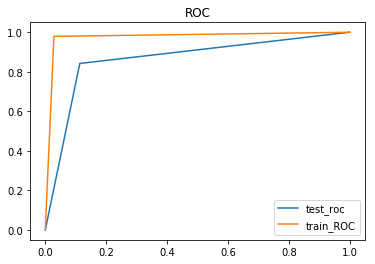

Probability density for train


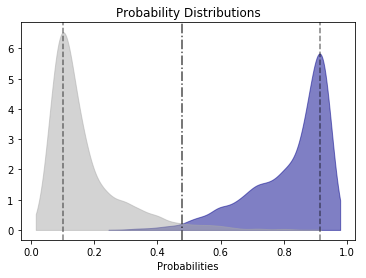

Probability density for test


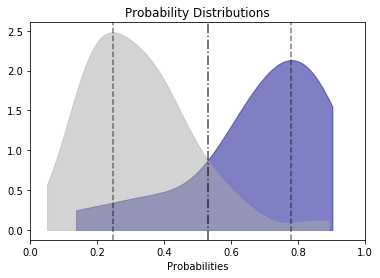


[[86 11]
 [ 3 16]]
CONFUSION MATRIX
Predicted   0   1  All
Actual                
0          86  11   97
1           3  16   19
All        89  27  116


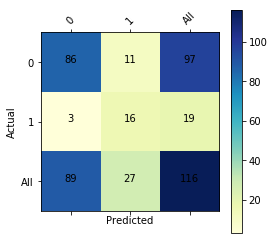


REPORT
             precision    recall  f1-score   support

          0       0.97      0.89      0.92        97
          1       0.59      0.84      0.70        19

avg / total       0.91      0.88      0.89       116

ACCURACY =  0.8793103448275862
-----------------


In [15]:
#TRY TO PREDICT TRAIN
prediction_train = rf_classifier.predict(triplexes_data)
prediction_prob_train = rf_classifier.predict_proba(triplexes_data)
fpr_train, tpr_train, _ = metrics.roc_curve(triplexes_target,  prediction_train)
auc_train = metrics.roc_auc_score(triplexes_target, prediction_train)
print("AUC_TRAIN = ", auc_train)
    
#---------------------------------
print("")
fpr, tpr, _ = metrics.roc_curve(triplexes_test_target,  prediction_result)
auc = metrics.roc_auc_score(triplexes_test_target, prediction_result)
print("AUC = ", auc)
line_test, = plt.plot(fpr, tpr, label='test_roc')
line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
plt.title("ROC")
plt.show()
    
print("Probability density for train")
probability_density(prediction_prob_train[:, 1], triplexes_target)
print("Probability density for test")
probability_density(predict_proba[:, 1], triplexes_test_target)
    
print("")
print(confusion_matrix(triplexes_test_target, prediction_result))
plot_confusion_matrix(pd.crosstab(triplexes_test_target, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


print("")
print("REPORT")
print(classification_report(triplexes_test_target, prediction_result))
print("ACCURACY = ", accuracy_score(triplexes_test_target, prediction_result))
print("-----------------")
